Support Vector Machine  
SVMs are a set of supervised learning method used for classification, regression and outliers detection

# 1 Classification
`SVC`, `NuSVC` and `LinearSVC` are classes capable of performing mulit-class classification on datasets.  
They take as input two arrays: an array X of size [n\_samples, n\_features] holding the training samples, and an array of y of class labels(strings or integers), size[n\_sample]

In [1]:
from sklearn import svm
X = [[0,0], [1,1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [2]:
clf.predict([[2,2]])

array([1])

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in members `support_vectors_`, `suppport_` and `n_supoort`

In [3]:
clf.support_vectors_

array([[ 0.,  0.],
       [ 1.,  1.]])

In [4]:
clf.support_

array([0, 1], dtype=int32)

In [5]:
clf.n_support_

array([1, 1], dtype=int32)

## 1.1 Multi-class classifiction
`SVC` and `NuSVC` implement the **one - against - one** approach for mulit-class classifiction. if $n\_class$ is the number of the classes, then $n\_class \times (n\_class-1)/2$ classifiers are constructed adn each one trains data from two classes.

In [6]:
X = [[0],[1], [2], [3]]
y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, y)
dec = clf.decision_function([[1]])
dec.shape[1]

6

In [7]:
clf.decision_function_shape = 'ovr'
dec = clf.decision_function([[1]])
dec.shape[1]

4

## 1.2 Scores and probabilities 
The `SVC` method `decision_funciton` gives per-class scores for each sample

## 1.3 Unbalanced problem
In problem where it is desired to give more importance to cetain classes or certian indivial samples keywords `class_weight` and `sample_weight`

## 1.4 Exmaples

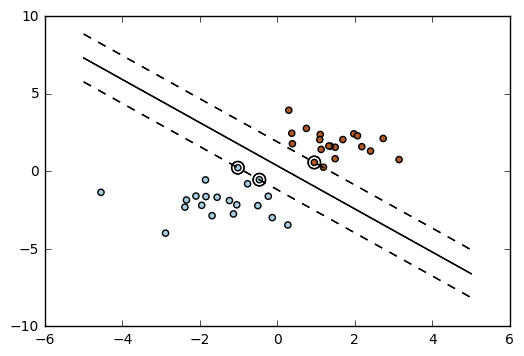

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
np.random.seed(0)
X = np.r_[np.random.randn(20,2)-[2,2], np.random.randn(20, 2)+[2,2]]
y = [0] * 20 + [1]*20
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
w = clf.coef_[0]
a = -w[0]/ w[1]
xx = np.linspace(-5, 5)
yy = a*xx - (clf.intercept_[0]) / w[1]
b = clf.support_vectors_[0]
yy_down = a *xx +(b[1]-a*b[0])
b = clf.support_vectors_[-1]
yy_up = a*xx +(b[1] - a*b[0])
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:,1],
           s=80, facecolor='None')
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

## 2 Regression
The method of Support Vector Classification can be extended to solve the regression problems. This method is called Support Regression.

In [18]:
from sklearn import svm
X = [[0,0],[2,2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y)
clf.predict([[1,1]])

array([ 1.5])

# 3 Density estimation, novelty detection
One-class SVM is used for novelty detection, that is, given a set of samples, it will detect the soft boundary of that set so as classify new points as belongs to thta set or not. The class is called `OneClassSVM`

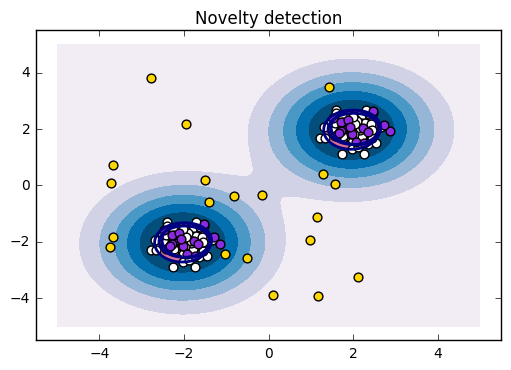

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5,5,500))
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# create some regular observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X+2, X-2]
# generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20,2))
# the model
clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.4)
clf.fit(X_train)
y_pred_train= clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_trains = y_pred_train[y_pred_train==-1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliners = y_pred_outliers[y_pred_outliers==1].size
# plot the line 
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title('Novelty detection')
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, color='darked')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:,1], c='white', s=s)
b2 = plt.scatter(X_test[:,0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(X_outliers[:,0], X_outliers[:, 1], c='gold', s=s)
plt.show()